In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

%matplotlib inline

In [2]:
# Input sercet number
secret_number = '0000001110110111'

In [4]:
# Create quantum circuit using n+1 qubits and n classical bits
# n is the length of the input string
secret_len = len(secret_number)
circuit = QuantumCircuit(secret_len+1, secret_len)

In [5]:
# Apply gates as per Bernstein-Vazirani Algorithm
circuit.h(range(secret_len))
circuit.x(secret_len)
circuit.h(secret_len)
circuit.barrier()

for i, n in enumerate(reversed(secret_number)):
    if int(n) ==1:
        circuit.cx(i, secret_len)

circuit.barrier()
circuit.h(range(secret_len))
circuit.barrier()

circuit.measure(range(secret_len), range(secret_len))

In [6]:
# circuit.draw(output='mpl')

In [7]:
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator, shots=1000).result()

count = result.get_counts()

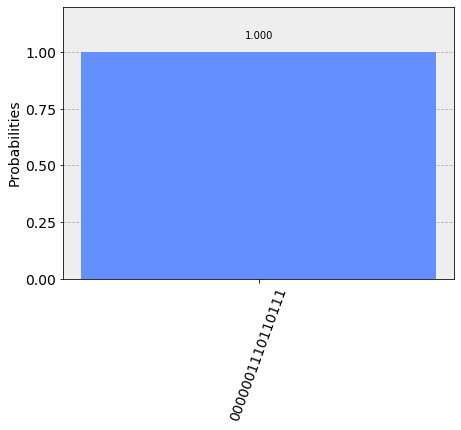

In [8]:
plot_histogram(count)